In [4]:
#install spacy
!pip install spacy


   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
    --------------------------------------- 0.3/12.2 MB ? eta -:--:--
    --------------------------------------- 0.3/12.2 MB ? eta -:--:--
    --------------------------------------- 0.3/12.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.2 MB 409.0 kB/s eta 0:00:29
   - -------------------------------------- 0.5/12.2 MB 409.0 kB/s eta 0:00:29
   - -------------------------------------- 0.5/12.2 MB 409.0 kB/s eta 0:00:29
   -- ------------------------------------- 0.8/12.2 MB 404.2 kB/s eta 0:00:29
   -- ------------------------------------- 0.8/12.2 MB 404.2 kB/s eta 0:00:29
   --- ------------------------------------ 1

In [5]:
import src.utils.pipelines as pip
%load_ext autoreload
%autoreload 2
# Uncomment the following line to write the data 
#main_chars, top_mov_per_year, cmu_imdb, movies_char, blockbusters, chars, movies = pip.write_CMU_and_IMDB() # /!\ takes a long time
# Uncomment the following line to read the data (way faster)
main_chars, top_mov_per_year, cmu_imdb, movies_char, blockbusters, chars, movies = pip.read_CMU_IMDB()

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
import src.utils.pipelines as pip
%load_ext autoreload
%autoreload 2
# Uncomment the following line to write the data 
#main_chars, top_mov_per_year, cmu_imdb, movies_char, blockbusters, chars, movies = pip.write_CMU_and_IMDB() # /!\ takes a long time
# Uncomment the following line to read the data (way faster)
main_chars, top_mov_per_year, cmu_imdb, movies_char, blockbusters, chars, movies = pip.read_CMU_IMDB()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#global_names, uk, us, fr, norway = pip.write_all_names_data()
global_names, uk, us, fr, norway = pip.read_all_names_data()

UK : Loading clean data from data/clean/names/ukbabynames.csv
France : Loading clean data from data/clean/names/france.csv
US : Loading clean data from data/clean/names/babyNamesUSYOB-full.csv
Norway : Loading clean data from data/clean/names/norway_merged.csv
UK & France & US & Norway : Loading clean data from data/clean/names/UK_France_US_Norway.csv


In [15]:
#mean = pip.load_influenced_means()
mean = pip.compute_all_influence_mean(main_chars, global_names) # changer avec le pays qu'on vuex


-------------------
Computing the influenced names using the mean difference......
-------------------
UK & France & US & Norway : Data is clean and conforms to the expected structure !
Splitting the names in 3918 main characters to 6512 names
Fraction of the main characters in the names data : 0.6767506142506142
25%
50%
75%
100%
Influenced names computed and saved in data/clean/influenced_names_means_diff.csv


c:\Users\Pauline\Documents\EPFL\Master\MA3\ada\ada-2024-project-dondata2025\src\utils\pipelines.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersection["Influence"] = intersection.apply(lambda x:


In [16]:
prophet = pip.compute_all_influence_prophet(mean, norway) # la meme


-------------------
Using the mean difference results to speed up the Prophet method......
-------------------
Using 1447 names to speed up the SARIMA method. (from 4407 names)


TypeError: 'float' object cannot be interpreted as an integer

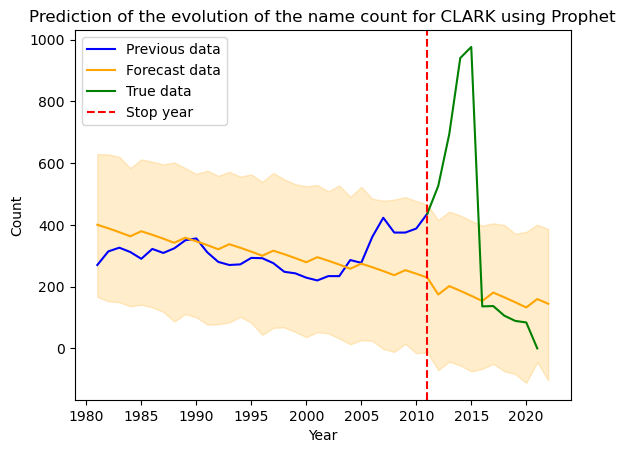

In [39]:
import src.models.naming_prediction as np

pred = pip.is_name_influenced_prophet("CLARK", global_names, 2011, True)

In [18]:
pred = pip.is_name_influenced_prophet("THOMAS", global_names, 1975, True)

AttributeError: 'Prophet' object has no attribute 'stan_backend'